<a href="https://colab.research.google.com/github/TrKer1121/AI_HomeWork/blob/main/ROBOT3DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import các thư viện
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam

In [3]:
#tạo dữ liệu
from re import U
import matplotlib.pyplot as plt
import math
import csv
import numpy as np
u=[]
z=[]
for i in range(0,121,3):
  for j in range(0,91,3):
    for k in range (0,91,3):
      x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))+30*math.cos(math.radians(i+j+k))
      y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))+30*math.sin(math.radians(i+j+k))
      t=i+j+k
      z.append(np.array((i,j,k,x,y,t)))
  u.extend(z)


In [4]:

header = ['anpha', 'beta','delta', 'x', 'y','phi']
with open('robot_3dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)

In [5]:
#xử lý dữ liệu
data = pd.read_csv('robot_3dof.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:3]
x=numpy_dataset[:,3:]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train[0])
print(y_train[0])
print("Original data is:\n",x_train)
print("Shape of data is: ",x_train.shape)
print("Original data is:\n",y_train)
print("Shape of data is: ",y_train.shape)

[-11.45995882  55.74233244 198.        ]
[39. 84. 75.]
Original data is:
 [[-11.45995882  55.74233244 198.        ]
 [ 59.01128673 104.30398509  63.        ]
 [ 24.83671051  46.01822654 168.        ]
 ...
 [ -6.68654506  57.26495223 195.        ]
 [ 29.20578519  70.16741602 123.        ]
 [ 99.85264876  60.87680771  54.        ]]
Shape of data is:  (661936, 3)
Original data is:
 [[39. 84. 75.]
 [57.  6.  0.]
 [ 0. 84. 84.]
 ...
 [36. 81. 78.]
 [ 6. 90. 27.]
 [24.  0. 30.]]
Shape of data is:  (661936, 3)


In [6]:
#tạo và training model
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (3,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(3,  activation='linear'))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 11,427
Trainable params: 11,427
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
16549/16549 [============================

sai so kiem tra la 2.2830302715301514
do chinh xac kiem tra 0.992017388343811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


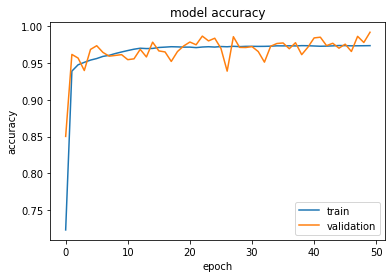

In [7]:
#đánh giá và vẽ đồ thị
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

In [10]:
#Kiểm tra lại
Px_test_train =   60
Py_test_train = 70
phi = 45
print(Px_test_train,Py_test_train,phi)
test = model.predict([[Px_test_train,Py_test_train,phi]])
t1 = test[0][0]
t2 = test[0][1]
t3 = test[0][2]

x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))+30*math.cos(math.radians(t1+t2+t3))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))+30*math.sin(math.radians(t1+t2+t3))
print('x = ',x_1,'y = ',y_1)
print(t1,t2,t3)

60 70 45
x =  53.651088087210745 y =  75.69587950949233
9.609037 89.96914 -31.10547


In [9]:
#save model
model.save('Rrobot3dof.h5')